# Euler on 1d SDE
## General 1d SDE

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''=========
sde class init
=========='''

class SDE_1d:
    def __init__(self,
                init_state = 1.,
                drift = lambda x: 0,
                vol = lambda x: 1.
                ):
        self.init_state = init_state
        self.drift = drift
        self.vol = vol
        

In [3]:
'''================
euler_1d_difference 
input:
    xh_i:  current state
    dt: time diff
    dw: bm increase
output:
    xh_i_diff: increase for euler solution
=================='''

def euler_1d_diff(self, xh_i, dt, dw):
    #set SDE param
    mu = self.drift
    sigma = self.vol
    
    return mu(xh_i)*dt + sigma(xh_i)*dw

SDE_1d.euler_diff = euler_1d_diff

In [4]:
'''==========
euler method as a method of SDE_1d
input:
    time grid: np.array (t_i: i = 0, 1, ..., n)
output: 
    euler solution: np.array (Xh_i: i = 0, 1, ..., n)
==========='''

def euler_1d(self, grid):
    #step_size dt
    dt = np.diff(grid)
    
    #generate 2d bm icrement
    dw = np.random.normal(0, np.sqrt(dt))

    #initialize euler solution
    x0 = self.init_state #1_d array
    xh = x0 + np.zeros(grid.shape)
    
    #run euler
    for i in range(dt.size):
        xh[i+1] = xh[i] + self.euler_diff(xh[i], dt[i], dw[i]) #euler iteration        
    return xh

SDE_1d.euler = euler_1d

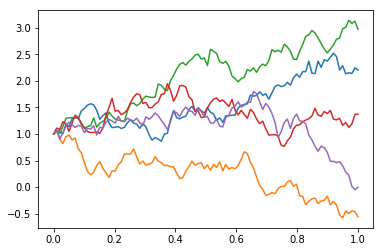

In [5]:
'''=============
test SDE_1d.euler
plot paths
=============='''
sde1 = SDE_1d() #By default, it is std bm
grid = np.linspace(0,1,100)

plt.figure()
for i in range(5):
    xh = sde1.euler(grid)
    plt.plot(grid, xh)

## Geometric Brownian motion

In [6]:
'''============
Gbm class inherited from sde_1d
============='''

class Gbm(SDE_1d):
    def __init__(self,
                 init_state = 100.,
                 drift_ratio = .0475,
                 vol_ratio = .2
                ):
        self.init_state = init_state
        self.drift = lambda x: drift_ratio*x
        self.vol = lambda x: vol_ratio*x
        

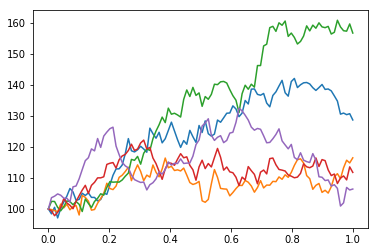

In [7]:
'''============
test:
    plot Gbm paths
=============='''
gbm1 = Gbm()
grid = np.linspace(0,1,100)

plt.figure()
for i in range(5):
    xh = gbm1.euler(grid)
    plt.plot(grid, xh)

Test Euler method: 
We implement ordinary MC to find BSM call price, compare with exact price, see [bsm_formula](./bsm_formula.ipynb)

In [8]:
'''=========
option class init
=========='''
class EuropeanOption:
    def __init__(self,
                otype = 1, # 1: 'call'
                        # -1: 'put'
                strike = 110.,
                maturity = 1.
                ):
        self.otype = otype
        self.strike = strike
        self.maturity = 1.
        
    def payoff(self, s): #s: excercise price
        otype = self.otype
        k = self.strike
        maturity = self.maturity
        return np.max([0, (s - k)*otype])
        

In [9]:
#initiate option and sde instances

option1 = EuropeanOption()
maturity = option1.maturity

gbm1 = Gbm()

In [10]:
'''==========
BSM option pricing based euler OMC
=========='''

r = gbm1.drift(1)

num_step = 10
time_grid = np.linspace(0, maturity, num_step+1)

num_path = 10000
terminal_price = [gbm1.euler(time_grid)[-1]  for i in range(num_path)]



In [11]:
#compute call price
payoff = [option1.payoff(s) for s in terminal_price]
call_value = np.exp(-r*maturity)*np.average(payoff)
print('call price is ' + str(call_value))

call price is 5.738692011593172


In [12]:
#compute put price
option1.otype = -1
payoff = [option1.payoff(s) for s in terminal_price]
put_value = np.exp(-r*maturity)*np.average(payoff)
print('put price is ' + str(put_value))

put price is 11.013657644314462
